# Team 12 FML assignment on Survey Data

Group members:
* Pusparghya Pakrasi (1916043)
* Gurunath Gandikota (1916016)
* Shekhar Kanodia (1916026)
* Swaminath Gowrishankar (1916018)

In [1]:
import pandas as pd
from datetime import datetime
from dateutil.parser import parse

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Print all outputs in a block - not just the last one
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
#Question 1
Responses = pd.read_csv("FMLResponses.csv", sep=',',
                     header = 0) 

In [4]:
#Question 2
Responses.head(2)

,Timestamp,Your educational background,Work experience in months - NOT years,How do you rate your ability to program?,What languages have you coded in?,How many lines of code have you written?,Why on earth a course in machine learning?,Why MBAs need to code?,What would your dream career be?,How are you killing time during this Covid season?,What did you say your mission was in life?
0,02-07-2020 09:52,Science,0,3,"C++, R, Python",Under 100 lines,I wouldn't be taking the course if I found DS ...,In case there's a need to troubleshoot or acti...,Manager,Reading books,I wanted to pursue behavioral economics and da...
1,02-07-2020 09:56,Engineering,47,4,"C, C++, R","More than 1,000 lines",It provides a toolkit to solve business proble...,"If a product is developed by writing code, the...",Sportsperson,Netflix/ Amazon Prime/ Hotstar,To become a well rounded financial services pr...


In [5]:
#Question 2
type(Responses)

pandas.core.frame.DataFrame

In [6]:
#Question 2: One way of getting numbers of Rows
Responses.count()

Timestamp                                             66
Your educational background                           66
Work experience in months - NOT years                 66
How do you rate your ability to program?              66
What languages have you coded in?                     66
How many lines of code have you written?              60
Why on earth a course in machine learning?            66
Why MBAs need to code?                                66
What would your dream career be?                      66
How are you killing time during this Covid season?    66
What did you say your mission was in life?            66
dtype: int64

The dataset has 66 rows/observations and 11 columns

In [7]:
#Question 2: Rows & Columns better way
print("Number of rows =", Responses.shape[0], "And number of columns =", Responses.shape[1])

Number of rows = 66 And number of columns = 11


Apart from Work experience and Ability to code, all other variables are of Object type and need to be changed

In [8]:
#Question 2: Data types of columns
Responses.dtypes

Timestamp                                             object
Your educational background                           object
Work experience in months - NOT years                  int64
How do you rate your ability to program?               int64
What languages have you coded in?                     object
How many lines of code have you written?              object
Why on earth a course in machine learning?            object
Why MBAs need to code?                                object
What would your dream career be?                      object
How are you killing time during this Covid season?    object
What did you say your mission was in life?            object
dtype: object

In [9]:
#Question 3: Columns renaming
New_Responses = Responses.rename(columns = {'Timestamp':'response_date', 
                            'Your educational background':'education',
                            'Work experience in months - NOT years':'work_ex',
                            'How do you rate your ability to program?':'code_ability',
                            'What languages have you coded in?':'languages',
                            'How many lines of code have you written?':'lines_of_code',
                            'Why on earth a course in machine learning?':'why_ml',
                            'Why MBAs need to code?':'mba_code_reasons',
                            'What would your dream career be?':'dream_career',
                            'How are you killing time during this Covid season?':'time_pass',
                            'What did you say your mission was in life? ':'life_mission'}
                )
New_Responses.head(2)

,response_date,education,work_ex,code_ability,languages,lines_of_code,why_ml,mba_code_reasons,dream_career,time_pass,life_mission
0,02-07-2020 09:52,Science,0,3,"C++, R, Python",Under 100 lines,I wouldn't be taking the course if I found DS ...,In case there's a need to troubleshoot or acti...,Manager,Reading books,I wanted to pursue behavioral economics and da...
1,02-07-2020 09:56,Engineering,47,4,"C, C++, R","More than 1,000 lines",It provides a toolkit to solve business proble...,"If a product is developed by writing code, the...",Sportsperson,Netflix/ Amazon Prime/ Hotstar,To become a well rounded financial services pr...


In [10]:
#Question 3 continuation
print("Before renaming columns: Responses dataset:-")
list(Responses)

print("After renaming columns:New_Responses dataset:-")
list(New_Responses)

New_Responses.dtypes

Before renaming columns: Responses dataset:-


['Timestamp',
 'Your educational background',
 'Work experience in months - NOT years',
 'How do you rate your ability to program?',
 'What languages have you coded in?',
 'How many lines of code have you written?',
 'Why on earth a course in machine learning?',
 'Why MBAs need to code?',
 'What would your dream career be?',
 'How are you killing time during this Covid season?',
 'What did you say your mission was in life? ']

After renaming columns:New_Responses dataset:-


['response_date',
 'education',
 'work_ex',
 'code_ability',
 'languages',
 'lines_of_code',
 'why_ml',
 'mba_code_reasons',
 'dream_career',
 'time_pass',
 'life_mission']

response_date       object
education           object
work_ex              int64
code_ability         int64
languages           object
lines_of_code       object
why_ml              object
mba_code_reasons    object
dream_career        object
time_pass           object
life_mission        object
dtype: object

In [11]:
#Question 4: convert response_date to Datetime variable
New_Responses['response_date'] = pd.to_datetime(New_Responses['response_date'])

In [12]:
#Question 5(a): Converting some columns into categorical
cat_cols = ["education", "languages", "lines_of_code", "dream_career", "time_pass"]
New_Responses[cat_cols] = New_Responses[cat_cols].astype("category")

In [13]:
#Question 5(b): Converting free flow value columns into string
str_cols = ["why_ml", "mba_code_reasons", "life_mission"]
#string_cols

New_Responses[str_cols] = New_Responses[str_cols].astype(str)

New_Responses.dtypes

response_date       datetime64[ns]
education                 category
work_ex                      int64
code_ability                 int64
languages                 category
lines_of_code             category
why_ml                      object
mba_code_reasons            object
dream_career              category
time_pass                 category
life_mission                object
dtype: object

All the variables' data types have been taken care of

In [14]:
New_Responses.head(3)

,response_date,education,work_ex,code_ability,languages,lines_of_code,why_ml,mba_code_reasons,dream_career,time_pass,life_mission
0,2020-02-07 09:52:00,Science,0,3,"C++, R, Python",Under 100 lines,I wouldn't be taking the course if I found DS ...,In case there's a need to troubleshoot or acti...,Manager,Reading books,I wanted to pursue behavioral economics and da...
1,2020-02-07 09:56:00,Engineering,47,4,"C, C++, R","More than 1,000 lines",It provides a toolkit to solve business proble...,"If a product is developed by writing code, the...",Sportsperson,Netflix/ Amazon Prime/ Hotstar,To become a well rounded financial services pr...
2,2020-02-07 10:00:00,Engineering,55,4,"C, C++, Java, Javascript","More than 1,000 lines",It is very evident that courses like machine l...,Technology is becoming an indispensable capabi...,Sportsperson,Reading books,"Sort of, I said that I wanted to make a career..."


In [15]:
#Question 11(a): Creating Truncated hour variable
#for some reason, month function is returning day and vice-versa
New_Responses["day"] = New_Responses['response_date'].dt.month
New_Responses["month"] = New_Responses['response_date'].dt.day
New_Responses["truncated_hour"] = New_Responses['response_date'].dt.hour

#del New_Responses["hour"]
New_Responses.tail(3)

,response_date,education,work_ex,code_ability,languages,lines_of_code,why_ml,mba_code_reasons,dream_career,time_pass,life_mission,day,month,truncated_hour
63,2020-03-07 22:52:00,Engineering,0,3,"C, C++","More than 1,000 lines",My internship in a consulting firm demanded kn...,MBAs require to continuously challenge the sta...,Musician,Watching sports,"People lie in their MBA interview, and MBA giv...",3,7,22
64,2020-03-07 23:14:00,Engineering,22,1,"None whatsoever, swear to God!",NaN,I think it's a useful tool to have in future's...,I have seen my previous company utilise coding...,Designer / Fresco painter,I paint daily and I am spending quality family...,"Yes, I am sticking to the same mission!",3,7,23
65,2020-03-07 23:28:00,Engineering,0,3,"C, Python","Between 100 and 1,000 lines",High relevance in the industry as AI is the fu...,New age managers are required to understand ho...,Sportsperson,Netflix/ Amazon Prime/ Hotstar,"In my MBA interview, I was still exploring dif...",3,7,23


In [16]:
#Question 11(b): Frequency count of Truncated hour and day variables
print("Frquency table of truncated Hours:")
New_Responses["truncated_hour"].value_counts()

print("Frquency table of Day:")
New_Responses["day"].value_counts()

print("More responses came on 3rd July than 2nd July. We will see this again while solving Question 7 below")

Frquency table of truncated Hours:


12    13
11     9
10     9
22     5
21     5
17     4
14     4
13     4
20     3
9      3
23     2
19     1
18     1
16     1
15     1
0      1
Name: truncated_hour, dtype: int64

Frquency table of Day:


3    38
2    28
Name: day, dtype: int64

More responses came on 3rd July than 2nd July. We will see this again while solving Question 7 below


In [17]:
#Question 9: Create inter arrival time variable and converitng to Mins using timedelta function dt.components['minutes']
New_Responses["Inter_Arrival_Time"] = New_Responses["response_date"].diff()

#Approach 1: The below doesnt work since timedelta objects dont have minute function
#New_Responses["Inter_Arrival_Time2"] = New_Responses["Inter_Arrival_Time"].dt.minute
#del New_Responses["Inter_Arrival_Time2"]

#Approach 2: This total_seconds() function isn't working for timedelta object but internet says it works
#New_Responses["Inter_Arrival_Time_Mins"] = divmod(New_Responses["Inter_Arrival_Time"].total_seconds, 60)

#Approach 3: using dt.components function of timedelta object to convert to mins - Worked
New_Responses["Inter_Arrival_Time_Hrs"] = New_Responses["Inter_Arrival_Time"].dt.components['hours']
New_Responses["Inter_Arrival_Time_Hrs"] = New_Responses["Inter_Arrival_Time_Hrs"]*60*60
New_Responses["Inter_Arrival_Time_Mins"] = New_Responses["Inter_Arrival_Time"].dt.components['minutes']
New_Responses["Inter_Arrival_Time_Mins"] = New_Responses["Inter_Arrival_Time_Mins"]*60
New_Responses["Inter_Arrival_Time_secs"] = New_Responses["Inter_Arrival_Time"].dt.components['seconds']

New_Responses["Inter_Arrival_Time_secs_sum"] = New_Responses["Inter_Arrival_Time_Hrs"] + New_Responses["Inter_Arrival_Time_Mins"] + New_Responses["Inter_Arrival_Time_secs"]

#replacing NAN values to 0 for Inter_Arrival_Time_Mins variable so that this variable can be converted to integer
New_Responses["Inter_Arrival_Time_secs_sum"] = New_Responses["Inter_Arrival_Time_secs_sum"].fillna(0)

#converting Inter_Arrival_Time_Mins from float to intereger variable
New_Responses["Inter_Arrival_Time_secs_sum"] = New_Responses["Inter_Arrival_Time_secs_sum"].astype("int")

New_Responses["Inter_Arrival_Time_Mins_Final"] = New_Responses["Inter_Arrival_Time_secs_sum"]/60
#replacing NAN values to 0 for Inter_Arrival_Time_Mins variable so that this variable can be converted to integer
New_Responses["Inter_Arrival_Time_Mins_Final"] = New_Responses["Inter_Arrival_Time_Mins_Final"].fillna(0)
#converting Inter_Arrival_Time_Mins from float to intereger variable
New_Responses["Inter_Arrival_Time_Mins_Final"] = New_Responses["Inter_Arrival_Time_Mins_Final"].astype("int")

New_Responses[27:29]

New_Responses.dtypes


,response_date,education,work_ex,code_ability,languages,lines_of_code,why_ml,mba_code_reasons,dream_career,time_pass,life_mission,day,month,truncated_hour,Inter_Arrival_Time,Inter_Arrival_Time_Hrs,Inter_Arrival_Time_Mins,Inter_Arrival_Time_secs,Inter_Arrival_Time_secs_sum,Inter_Arrival_Time_Mins_Final
27,2020-02-07 22:34:00,Engineering,108,4,"C, Java, Python","More than 1,000 lines",I am a software engineer by profession and fou...,I think now coding is very important for all t...,Professor :),Office and PGPEM is keeping me occupied. Workl...,My mission was to rise the corporate ladder an...,2,7,22,0 days 00:43:00,0.0,2580.0,0.0,2580,43
28,2020-03-07 00:35:00,Engineering,22,3,C,"Between 100 and 1,000 lines",I am interested in learning about how ML could...,"To be able to understand application of ML, it...",Sportsperson,All of the above,My mission is learn more about business and de...,3,7,0,28 days 02:01:00,7200.0,60.0,0.0,7260,121


response_date                     datetime64[ns]
education                               category
work_ex                                    int64
code_ability                               int64
languages                               category
lines_of_code                           category
why_ml                                    object
mba_code_reasons                          object
dream_career                            category
time_pass                               category
life_mission                              object
day                                        int64
month                                      int64
truncated_hour                             int64
Inter_Arrival_Time               timedelta64[ns]
Inter_Arrival_Time_Hrs                   float64
Inter_Arrival_Time_Mins                  float64
Inter_Arrival_Time_secs                  float64
Inter_Arrival_Time_secs_sum                int64
Inter_Arrival_Time_Mins_Final              int64
dtype: object

In [18]:
New_Responses[27:30]

,response_date,education,work_ex,code_ability,languages,lines_of_code,why_ml,mba_code_reasons,dream_career,time_pass,life_mission,day,month,truncated_hour,Inter_Arrival_Time,Inter_Arrival_Time_Hrs,Inter_Arrival_Time_Mins,Inter_Arrival_Time_secs,Inter_Arrival_Time_secs_sum,Inter_Arrival_Time_Mins_Final
27,2020-02-07 22:34:00,Engineering,108,4,"C, Java, Python","More than 1,000 lines",I am a software engineer by profession and fou...,I think now coding is very important for all t...,Professor :),Office and PGPEM is keeping me occupied. Workl...,My mission was to rise the corporate ladder an...,2,7,22,0 days 00:43:00,0.0,2580.0,0.0,2580,43
28,2020-03-07 00:35:00,Engineering,22,3,C,"Between 100 and 1,000 lines",I am interested in learning about how ML could...,"To be able to understand application of ML, it...",Sportsperson,All of the above,My mission is learn more about business and de...,3,7,0,28 days 02:01:00,7200.0,60.0,0.0,7260,121
29,2020-03-07 09:20:00,Engineering,48,4,"C, Java, Python, Javascript","More than 1,000 lines",To understand the business context of machine ...,I disagree that ML must = coding. ML is now a ...,Manager,Offbeat online courses,Yes.. moving towards it with hits and misses. ...,3,7,9,0 days 08:45:00,28800.0,2700.0,0.0,31500,525


In [19]:
del New_Responses['Inter_Arrival_Time']
del New_Responses['Inter_Arrival_Time_Hrs']
del New_Responses['Inter_Arrival_Time_Mins']
del New_Responses['Inter_Arrival_Time_secs']
del New_Responses['Inter_Arrival_Time_secs_sum']

New_Responses[18:22]

,response_date,education,work_ex,code_ability,languages,lines_of_code,why_ml,mba_code_reasons,dream_career,time_pass,life_mission,day,month,truncated_hour,Inter_Arrival_Time_Mins_Final
18,2020-02-07 14:25:00,Engineering,30,3,"C, C++, Java, Javascript, Angular 5","Between 100 and 1,000 lines",Then I will understand what everyone else is t...,To understand how the engineers under them work.,Psychologist,Netflix/ Amazon Prime/ Hotstar,Pursue my interests in technology and marketin...,2,7,14,17
19,2020-02-07 17:01:00,Engineering,40,4,"C, C++, R, Python","More than 1,000 lines",What to know what the buzz is about,I look coding from the logical perspective. As...,Teacher,Reading books,I think i do. Coming from a tech backgroud I w...,2,7,17,156
20,2020-02-07 17:45:00,Engineering,39,4,"C++, Java","More than 1,000 lines",I was always fascinated by coding and creating...,Big Data and machine learning have brought abo...,Musician,Learning musical instrument (Keyboard),I see myself as being a successful marketer an...,2,7,17,44
21,2020-02-07 18:19:00,Engineering,34,4,"C, C++, Java","More than 1,000 lines",I want to pursue a career in product managemen...,I believe it is important for an MBA to unders...,Sportsperson,Netflix/ Amazon Prime/ Hotstar,I believe I am sticking to my plan. I was aske...,2,7,18,34


In [20]:
#checking Inter_Arrival_Time_Mins variable's freq distribution

New_Responses["Inter_Arrival_Time_Mins_Final"].value_counts()

3      8
4      5
7      4
17     3
11     3
0      2
14     2
1      2
8      2
9      2
43     2
21     1
20     1
16     1
10     1
525    1
12     1
24     1
6      1
2      1
22     1
28     1
125    1
156    1
121    1
119    1
13     1
115    1
93     1
56     1
51     1
49     1
46     1
44     1
42     1
40     1
38     1
37     1
34     1
30     1
29     1
26     1
Name: Inter_Arrival_Time_Mins_Final, dtype: int64

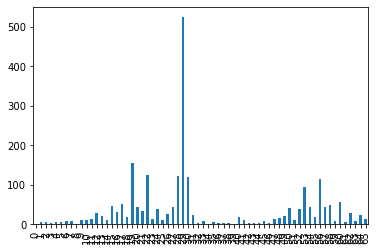

In [21]:
#Question 10(a): Chart showing Inter arrival time (in Mins) by 66 students

New_Responses['Inter_Arrival_Time_Mins_Final'].plot.bar();

The above plot of Inter arrival time shows a spike for 29th student entry who responded on 3rd July morning and the difference in time is overnight hours from 2nd July to 3rd July


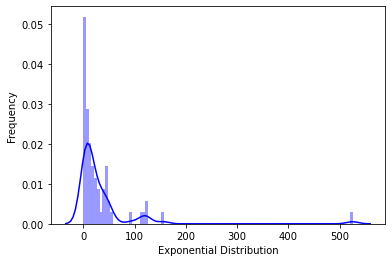

In [22]:
#Question 10(b): Fitting exponential curve to Inter arrival time variable (in mins)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

ax=sns.distplot(New_Responses['Inter_Arrival_Time_Mins_Final'], 
             kde=True, 
             bins=100, 
             color='blue'
            #hist_kws={"linewidth": 15,'alpha':1}
            );
ax.set(xlabel='Exponential Distribution', ylabel='Frequency');

col_0    count
work_ex       
0           11
6            1
9            1
10           1
12           1
13           1
19           1
20           1
22          12
23           3
29           1
30           3
32           2
33           2
34           4
35           2
39           1
40           2
44           1
45           2
46           2
47           3
48           2
52           1
55           1
57           1
66           1
108          1
180          1


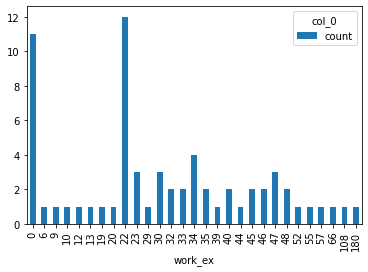

In [23]:
#Question 13(a): Work Exp bar chart

table1 = pd.crosstab(index=New_Responses.work_ex, columns="count")
print(table1)

table1.plot.bar()

The bars indicate that inter arrival time is exponentially distributed

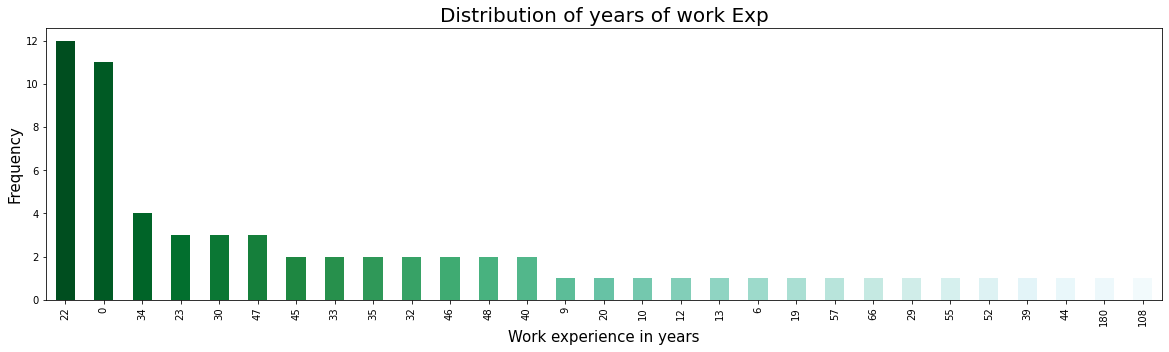

In [24]:
#Question 13(a): Work Exp bar chart
count_work_ex=New_Responses["work_ex"].value_counts()

plot = count_work_ex.plot(kind='bar', 
                    #title ="Distribution of Work Exp (in years)",
                    figsize=(20, 5),
                    color=sns.color_palette("BuGn_r", len(count_work_ex)),           
                    fontsize=10);
plot.set_title("Distribution of years of work Exp", fontsize=20);
plot.set_xlabel("Work experience in years", fontsize=15);
plot.set_ylabel("Frequency", fontsize=15);
plot;

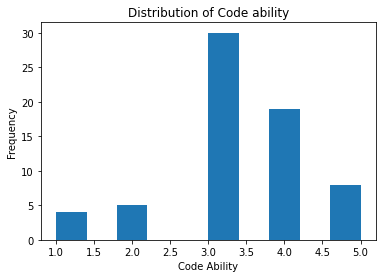

In [25]:
#Question 13(b): Code ability histogram
plt.hist(New_Responses['code_ability'], rwidth=10);
plt.title("Distribution of Code ability")
plt.xlabel("Code Ability");
plt.ylabel("Frequency");

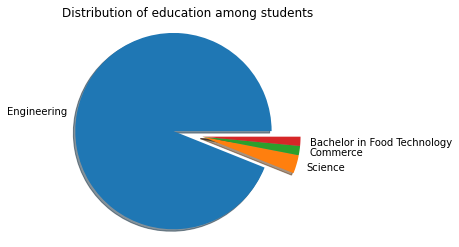

In [26]:
#Question 13(c): Education pie chart
count = New_Responses["education"].value_counts()

#data = {"education": ["Engineering", "Science", "Commerce", "Bachelor in Food Technology"],
#     "count": [62,2,1,1]}

#for_pie_data =pd.DataFrame(data)
#for_pie_data

import matplotlib.pyplot as plt

education=["Engineering", "Science", "Commerce", "Bachelor in Food Technology"]
count=[62,2,1,1]
explode = (0.3,0,0,0)
plt.pie(count, 
        labels=education,
        explode=explode,
        shadow=True
        #autopct='%1.1f%'
       );
plt.axis('equal')
plt.title("Distribution of education among students");

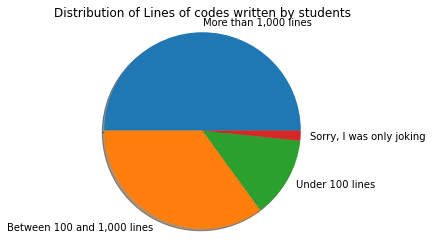

In [27]:
#Question 13(d): Lines of code pie chart
count = New_Responses["lines_of_code"].value_counts()


linecode=["More than 1,000 lines", "Between 100 and 1,000 lines", "Under 100 lines", "Sorry, I was only joking"]
count=[30,21,8,1]
#explode = (0.1,0,0,0)
plt.pie(count, 
        labels=linecode,
 #       explode=explode,
        shadow=True
        #autopct='%1.1f%'
        );
plt.axis('equal')
plt.title("Distribution of Lines of codes written by students");

In [28]:
#Doing some EDA
pd.crosstab(New_Responses["code_ability"], New_Responses["lines_of_code"])

#New_Responses["languages"].value_counts()

lines_of_code,"Between 100 and 1,000 lines","More than 1,000 lines","Sorry, I was only joking",Under 100 lines
code_ability,,,,
1,0,0,0,1
2,1,0,0,2
3,17,6,1,5
4,3,16,0,0
5,0,8,0,0


* As expected, students who have self-evaluated their coding ability above 3 have coded 'More than 1000 lines'
* Most of students who self-evaluated as '3' have coded between 100 to 1000 lines. Could have given themselves higher score in ability to code 

In [29]:
#Question 6: Creating the Hour_slot variable based on consecutive hours
New_Responses['hour_slot']=New_Responses.apply(lambda x:1, axis=1)

#for i in range(0,len(New_Responses)):
 #   New_Responses.hour_slot[i]=datetime.time(New_Responses.response_date[i]).hour
    
#del New_Responses['hour_slot']

New_Responses['truncated_hour_diff'] = New_Responses['truncated_hour'].diff()
New_Responses["truncated_hour_diff"] = New_Responses["truncated_hour_diff"].fillna(0)

for i in range(1,len(New_Responses)):
    if(New_Responses.truncated_hour_diff[i]==0):
        New_Responses.hour_slot[i]=New_Responses.hour_slot[i-1]
    elif(New_Responses.truncated_hour_diff[i]>0):
        New_Responses.hour_slot[i]=New_Responses.hour_slot[i-1] + New_Responses.truncated_hour_diff[i]
    elif(New_Responses.truncated_hour_diff[i]<0):
        New_Responses.hour_slot[i]=New_Responses.hour_slot[i-1] + (24+New_Responses.truncated_hour_diff[i])
    else:
        New_Responses.hour_slot[i]=0

<ipython-input-29-87878227955b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_Responses.hour_slot[i]=New_Responses.hour_slot[i-1]
<ipython-input-29-87878227955b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_Responses.hour_slot[i]=New_Responses.hour_slot[i-1] + New_Responses.truncated_hour_diff[i]
<ipython-input-29-87878227955b>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_Responses.hour_slot[i]=New_Responses.h

In [30]:
#Checking new variable hour_slot
#New_Responses['hour_slot']

variables = ['response_date','day','truncated_hour','hour_slot']
New_Responses[variables].head(35)
#New_Responses[18:30]

,response_date,day,truncated_hour,hour_slot
0,2020-02-07 09:52:00,2,9,1
1,2020-02-07 09:56:00,2,9,1
2,2020-02-07 10:00:00,2,10,2
3,2020-02-07 10:02:00,2,10,2
4,2020-02-07 10:06:00,2,10,2
5,2020-02-07 10:12:00,2,10,2
6,2020-02-07 10:19:00,2,10,2
7,2020-02-07 10:27:00,2,10,2
8,2020-02-07 10:27:00,2,10,2
9,2020-02-07 10:37:00,2,10,2


In [31]:
#Question 7: Frequency count of Hour_slot variable
print("Frquency table of Hour_slot variable:")
New_Responses['hour_slot'].value_counts()

Frquency table of Hour_slot variable:


28    11
2      9
27     6
38     4
3      3
13     3
29     3
39     2
4      2
6      2
9      2
12     2
1      2
30     2
33     2
37     2
16     1
14     1
31     1
10     1
32     1
5      1
35     1
36     1
25     1
Name: hour_slot, dtype: int64

The above frequency chart indicates there are more responses in hourly slots which are above 24. This indicates there are more responses on 3rfd July than on 2nd July (we have seen this before as well)

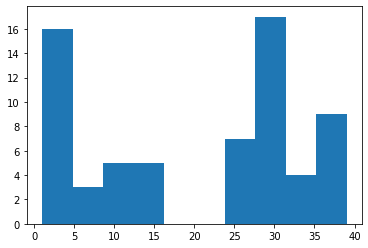

In [32]:
#Question 8(a): Plotting Hout_slot variable histogram
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#sns.distplot(New_Responses['hour_slot'], kde=True, color='blue');

plt.hist(New_Responses['hour_slot']);

Some of the hour slots have 0 frequency becuase no student responded to the survey during those hourly slots

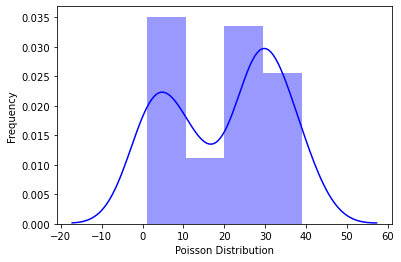

In [33]:
#Question 8(b): Fitting a density plot on Hour_slot variable to check if it follows Poisson distribution
ax=sns.distplot(New_Responses['hour_slot'], kde=True, color='blue');
ax.set(xlabel='Poisson Distribution', ylabel='Frequency');

The above bar chart indicates the hour slot variable is Poisson distribution

In [34]:
New_Responses.head(3)

,response_date,education,work_ex,code_ability,languages,lines_of_code,why_ml,mba_code_reasons,dream_career,time_pass,life_mission,day,month,truncated_hour,Inter_Arrival_Time_Mins_Final,hour_slot,truncated_hour_diff
0,2020-02-07 09:52:00,Science,0,3,"C++, R, Python",Under 100 lines,I wouldn't be taking the course if I found DS ...,In case there's a need to troubleshoot or acti...,Manager,Reading books,I wanted to pursue behavioral economics and da...,2,7,9,0,1,0.0
1,2020-02-07 09:56:00,Engineering,47,4,"C, C++, R","More than 1,000 lines",It provides a toolkit to solve business proble...,"If a product is developed by writing code, the...",Sportsperson,Netflix/ Amazon Prime/ Hotstar,To become a well rounded financial services pr...,2,7,9,4,1,0.0
2,2020-02-07 10:00:00,Engineering,55,4,"C, C++, Java, Javascript","More than 1,000 lines",It is very evident that courses like machine l...,Technology is becoming an indispensable capabi...,Sportsperson,Reading books,"Sort of, I said that I wanted to make a career...",2,7,10,4,2,1.0


col_0      count
hour_slot       
1              2
2              9
3              3
4              2
5              1
6              2
9              2
10             1
12             2
13             3
14             1
16             1
25             1
27             6
28            11
29             3
30             2
31             1
32             1
33             2
35             1
36             1
37             2
38             4
39             2


Text(0.5, 0, 'Time in hours')

Text(0, 0.5, 'Response arrival count')

Text(0.5, 1.0, 'Timeseries plot: Response arrival count')

No handles with labels found to put in legend.


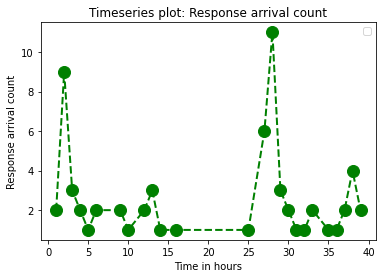

In [35]:
# Question 12
table = pd.crosstab(index=New_Responses.hour_slot, columns="count")
print(table)

plt.plot(table, color='green', marker='o', linestyle='dashed',linewidth=2, markersize=12)
plt.xlabel('Time in hours')
plt.ylabel('Response arrival count')
plt.title('Timeseries plot: Response arrival count')
plt.legend()
plt.show()

Question 14:
* We can create word cloud on the free flow text variables
* Sentiment analysis: classify statements as indifferent, postive, negative etc.